# 🧪 Part 00: Synthetic Data Generation (Initial Exploration)

Before implementing advanced AI algorithms (as seen in Chronos modules I and II), the project began with basic modeling of archaeological behavior.

In this exploratory script, we created a simple **Stratigraphy Simulator**. The goal is to generate a controlled *dataset* (`excavation_data.csv`) that adheres to the **Law of Superposition**: the deeper the artifact, the older it tends to be.

**Simulation Rules:**
* **Surface Layer (0 to -1m):** Recent artifacts (100 - 500 years old).
* **Middle Layer (-1m to -3m):** Intermediate period (500 - 2,000 years old).
* **Deep Layer (-3m to -5m):** Ancient/Neolithic period (2,000 - 8,000 years old).

Below, we randomly generate 200 excavation points with varied materials (ceramics, bones, lithics) to test spatial dispersion.

### 📚 Library Import

In this exploratory phase, we utilize an essential Data Science toolkit to create and visualize our simulation:

* **`pandas`**: Fundamental for structuring our data into tables (DataFrames) and exporting the final result to CSV (our simulated "database").
* **`matplotlib.pyplot`**: Used to generate 2D plots and visually validate if the artifact distribution follows the geological rules we defined.
* **`numpy`**: The standard library for efficient numerical computing. Although we rely heavily on the `random` module here, NumPy is the foundation for the vectorized operations we will perform in the upcoming modules.
* **`random`**: The engine of our simulation. It allows us to generate random coordinates and attributes, introducing the "chaos" and unpredictability typical of a real archaeological site.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

plt.style.use('ggplot') # Academic style for plots

In [30]:
# Configuration
NUM_ARTIFACTS = 200     # We will generate 200 artifacts
FIELD_WIDTH = 50.0      # The terrain is 50 x 50 meters
MAX_DEPTH = 5.0         # Excavation up to 5 meters deep

# List of possibilities
material_types = ['ceramic', 'bone', 'lithic', 'charcoal', 'metal', 'glass']
layers = ['surface', 'middle', 'deep']

data = []

print(f"Generating data for {NUM_ARTIFACTS} artifacts...")

for i in range(1, NUM_ARTIFACTS + 1):
    # Generate random X and Y coordinates
    x = round(random.uniform(0, FIELD_WIDTH), 2)
    y = round(random.uniform(0, FIELD_WIDTH), 2)

    # Generate Z depth (negative, as it is underground)
    # random.uniform returns a random float
    z = round(random.uniform(-MAX_DEPTH, 0), 2)

    # "Scientific" Logic: The deeper it is, the older it tends to be
    # We add some randomness (noise) so it's not "perfectly" linear
    if z > -1.0:
        layer = 'surface'
        base_age = random.randint(100, 500) # Recent years
    elif z > -3.0:
        layer = 'middle'
        base_age = random.randint(500, 2000) # Middle age
    else:
        layer = 'deep'
        base_age = random.randint(2000, 8000) # Very ancient

    # Choose a random material
    material = random.choice(material_types)

    # Append the row to the data list
    data.append([i, material, layer, x, y, z, base_age])

# Create the DataFrame (Table) using Pandas
# Note: Column names translated for consistency
df = pd.DataFrame(data, columns=['id', 'material', 'soil_layer', 'x', 'y', 'z', 'carbon14_years'])

# Save to CSV
filename = 'excavation_data.csv'
df.to_csv(filename, index = False)

print(f"Success! File '{filename}' generated with {NUM_ARTIFACTS} rows.")

Generating data for 200 artifacts...
Success! File 'excavation_data.csv' generated with 200 rows.


### 💾 Data Loading & Initial Inspection

Following the field collection simulation, the next logical step in any Data Science pipeline is **Data Ingestion**.

Here, we utilize `pd.read_csv` to load the file generated in the previous step. This simulates a real-world scenario where the archaeologist receives a raw dataset from the survey team. The `head()` command is critical here: it allows us to perform a **Sanity Check**, ensuring that:
1. The file was loaded correctly.
2. The columns (`material`, `x`, `y`, `z`) follow the expected structure.
3. There is no obvious data corruption before we begin statistical analysis.

In [31]:
# Load the CSV file
df = pd.read_csv('excavation_data.csv')

# Display the first 5 rows to verify the data loaded correctly
display(df.head())

,id,material,soil_layer,x,y,z,carbon14_years
0,1,lithic,middle,17.55,18.71,-1.67,1006
1,2,charcoal,deep,15.76,48.05,-4.28,4390
2,3,ceramic,deep,29.41,20.94,-4.21,6829
3,4,charcoal,middle,3.47,22.65,-2.69,1994
4,5,bone,surface,1.95,15.20,-0.38,354


### 📊 Structural Audit & Statistical Summary

Once the data is loaded, we need to perform a "screening" to understand the integrity and mathematical distribution of our *dataset*. We utilize two fundamental Pandas methods:

1.  **`df.info()` (Integrity Check):**
    * Verifies data types (*Dtypes*). It is crucial to confirm that coordinates (`x`, `y`, `z`) were interpreted as numbers (`float64`) rather than text strings.
    * Counts non-null values (*Non-Null Count*). If there were any gaps in the data (e.g., sensor errors or missing values), we would detect them here.

2.  **`df.describe()` (Descriptive Statistics):**
    * Generates a mathematical summary (Mean, Standard Deviation, Min, Max, and Quartiles) for the numeric columns.
    * **In our context:** We examine the `min` and `max` of columns `x` and `y` to confirm they cover the expected area (0 to 50m) and check the `z` column to ensure the maximum depth does not exceed the defined geological limit (-5m).

In [32]:
# --- 1. DATA VERIFICATION ---
print("--- INFO ---")
df.info()

print()

# --- 2. DESCRIPTIVE STATISTICS ---
print("\n--- STATISTICS ---")
display(df.describe())

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              200 non-null    int64  
 1   material        200 non-null    object 
 2   soil_layer      200 non-null    object 
 3   x               200 non-null    float64
 4   y               200 non-null    float64
 5   z               200 non-null    float64
 6   carbon14_years  200 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 11.1+ KB


--- STATISTICS ---


,id,x,y,z,carbon14_years
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,22.810950,25.869200,-2.519200,2639.745000
std,57.879185,14.264652,14.230608,1.423621,2396.351733
min,1.000000,0.070000,0.040000,-4.910000,115.000000
25%,50.750000,10.850000,12.897500,-3.680000,535.250000
50%,100.500000,19.825000,26.660000,-2.625000,1635.000000
75%,150.250000,34.840000,38.172500,-1.167500,4349.500000
max,200.000000,49.530000,49.890000,-0.020000,7987.000000


### 🔍 Filtering & Segmentation (Querying)

One of the most common tasks in data analysis is isolating specific subsets for detailed study. In an archaeological context, this is equivalent to separating findings by "Material Culture" for typological analysis.

In this section, we utilize Pandas' **Boolean Indexing** technique. By applying the mask `df['material'] == 'ceramic'`, we are simulating a direct query to our database: *"Which and how many ceramic fragments were found?"*.

This segmentation allows us to focus the analysis on specific groups without interference from other data types (noise).

In [33]:
# Example 1: Filter only 'ceramic' items
ceramics = df[df['material'] == 'ceramic']
print(f'Total ceramic pieces: {len(ceramics)}')

Total ceramic pieces: 37


### 🧠 Multi-Criteria Queries (Boolean Logic)

Real-world data analysis rarely relies on a single condition. Often, we need to cross-reference variables to uncover specific patterns or isolate rare samples.

In this section, we introduce combined **Boolean Logic** (the `AND` Operator).
* **Syntax:** In Pandas, we use the `&` symbol for the logical "AND".
* **Golden Rule:** Each individual condition must be enclosed in parentheses `(...) & (...)` to prevent operator precedence errors.

**Scientific Context:**
By filtering for *'bone'* at depths *greater than 2 meters* (z < -2.0), we are applying chronological and material filters simultaneously. This isolates potential **ancient burials or extinct fauna**, separating them from mere recent food waste found on the surface.

In [34]:
# Example 2: Complex Filtering (AND Condition)
# We want: Material 'bone' AND depth greater than 2 meters (remember it is negative, so < -2.0)
deep_bones = df[(df['material'] == 'bone') & (df['z'] < -2.0)]

display(deep_bones)

,id,material,soil_layer,x,y,z,carbon14_years
14,15,bone,deep,2.59,13.83,-4.33,4714
22,23,bone,deep,48.61,12.32,-3.86,6833
40,41,bone,deep,24.14,40.60,-4.35,4509
45,46,bone,deep,41.75,27.70,-3.65,6590
59,60,bone,deep,17.87,23.63,-3.56,5635
94,95,bone,deep,7.72,33.38,-3.72,5810
112,113,bone,deep,9.90,41.61,-4.76,7082
121,122,bone,middle,13.19,19.35,-2.85,578
127,128,bone,deep,19.75,0.69,-4.21,6144
139,140,bone,deep,39.41,11.50,-3.22,6992


### 📈 Hypothesis Visualization (Correlation)

In Data Science, we never assume data is correct simply because the code executed without errors. We must **visualize** the correlations to validate our model.

In this *Scatter Plot*, we visually test the **Law of Superposition**:

* **X-Axis (Depth/`z`):** The further left (lower negative value), the deeper the location.
* **Y-Axis (Age/`carbon14_years`):** The higher the point, the older the artifact.

**What we expect to see:**
A clear trend (diagonal) where deeper points correspond to older ages. Transparency (`alpha=0.6`) is used intentionally to observe artifact density: where points overlap, the color intensifies, indicating a "dense site" or cluster.

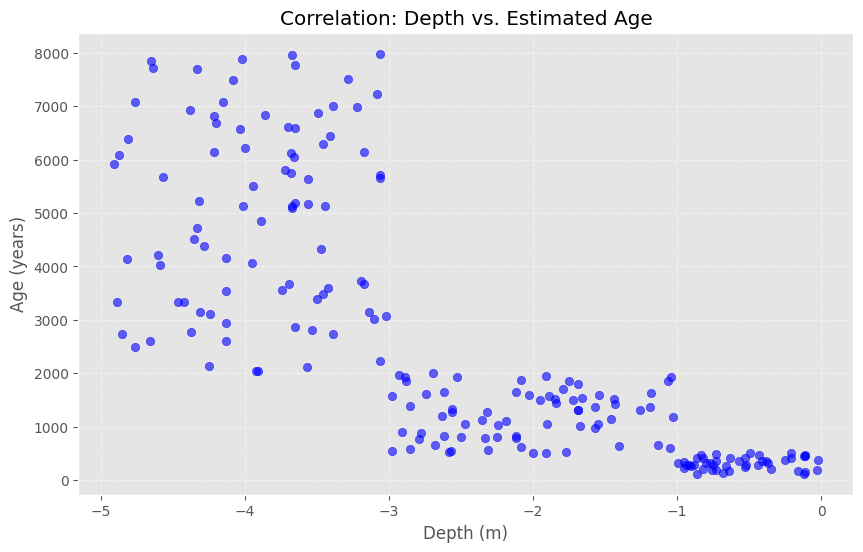

In [35]:
plt.figure(figsize=(10, 6))

# Scatter plot
# X Axis = Depth, Y Axis = Age
plt.scatter(df['z'], df['carbon14_years'], c = 'blue', alpha = 0.6)

plt.title('Correlation: Depth vs. Estimated Age')
plt.xlabel('Depth (m)')
plt.ylabel('Age (years)')
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.show()

#### 📉 Reading the Plot: The Signature of Time

This *scatter plot* acts as a visual validation of our data generation algorithm. We can observe three fundamental characteristics that confirm the simulation's integrity:

1.  **Negative Linear Trend:** A clear "diagonal" forms from the top left (deep and ancient) to the bottom right (shallow and recent). This visually confirms the **Law of Superposition**: deeper layers contain artifacts with older Carbon-14 dating.
2.  **Dispersion (Stochastic Noise):** The points do not form a perfect straight line. The data "cloud" reflects the randomness we introduced in the code (`random`). In the real world, this would represent phenomena such as bioturbation (roots or animals moving pieces) or measurement inaccuracies, making the model more realistic than a perfect linear function.
3.  **Depth Clusters:** It is possible to notice density groupings that correspond to the three geological zones defined in our business rules (Surface, Middle, and Deep).

### 🧊 Volumetric Visualization (3D Mapping)

Archaeology is inherently three-dimensional. A simple 2D plan view ignores stratigraphy, which is where the site's chronology resides.

In this section, we use Matplotlib's `mplot3d` toolkit to digitally reconstruct the excavation trench.

* **Semantic Color Mapping:** We create a dictionary (`colors`) to ensure each material has a distinct visual identity (e.g., Charcoal = Black, Metal = Gold), facilitating the visual interpretation of the plot.
* **Iterative Plotting:** Instead of plotting everything at once, we iterate over each material type. This is a necessary technique in Matplotlib to ensure the **legend** is generated correctly, allowing us to distinguish each category.

**The Result:** An initial "Point Cloud", which will serve as the basis for the clustering algorithms (DBSCAN) we will apply in the advanced notebooks (Parts I and II).

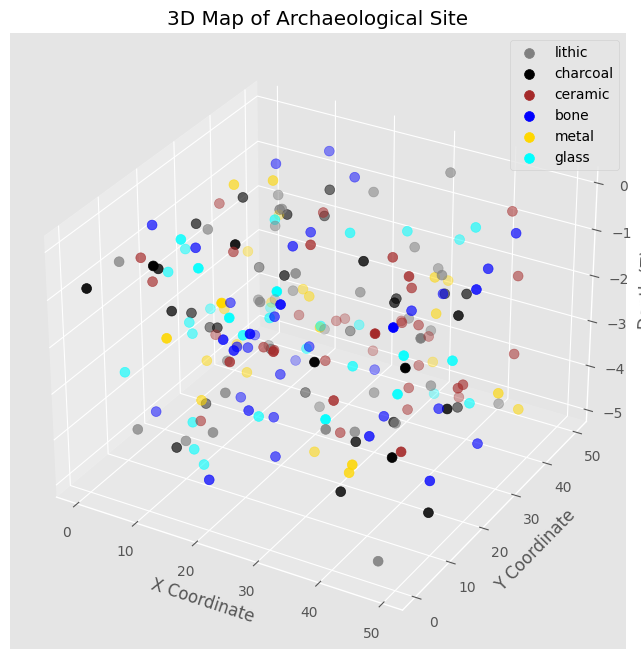

In [36]:
# Create the 3D figure
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

# Mapping colors to materials (color dictionary)
colors = {'ceramic': 'brown', 'bone': 'blue', 'lithic': 'gray',
          'charcoal': 'black', 'metal': 'gold', 'glass': 'cyan'}

# Plot each material separately to ensure correct legend generation
for material in df['material'].unique():
    # Filter only the current material in the loop
    material_data = df[df['material'] == material]

    # Plot
    ax.scatter(material_data['x'],
               material_data['y'],
               material_data['z'], # Updated column name
               c = colors.get(material, 'purple'), # If color not defined, use purple
               label = material,
               s = 50) # s is the marker size

# Chart configurations
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Depth (Z)')
ax.set_title('3D Map of Archaeological Site')
ax.legend()

plt.show()

#### 🧐 Volumetric Model Interpretation

The 3D visualization above offers us the first spatial perspective of the simulated archaeological site. Unlike 2D plots, here we can observe the interaction between **location (X, Y)**, **depth (Z)**, and **material typology (Colors)**.

**Key Observations:**

1.  **Spatial Distribution (Entropic Chaos):**
    * Since we utilized a uniform distribution (`random.uniform`), artifacts appear scattered throughout the 50x50m volume without forming clear "walls" or "foundations". This represents a scenario of **post-depositional dispersion** or a site without preserved architectural structures.

2.  **Stratigraphy (The Z-Axis):**
    * It is visually possible to notice the "depth" of the findings. The "deepest" points (near Z = -5.0) represent the oldest occupation horizon.

3.  **Material Signatures:**
    * The colors allow us to rapidly identify the predominance of certain materials. If there were a specific discard area (e.g., a pile of ceramics), we would see a cluster of **brown** points. In this simulation, materials are mixed, indicating a heterogeneous context.

**Next Steps:**
This "raw" visualization is the starting point. In the upcoming notebooks (Chronos I and II), we will apply **Clustering algorithms (DBSCAN)** to attempt to find order in this chaos, identifying groupings that the human eye cannot perceive alone.

### 📉 Virtual Excavation (Overburden Removal)

One of the greatest advantages of digital archaeology is the ability to "clean" the site instantly. Frequently, the surface layer (0 to -2m) is contaminated with modern debris or recent soil disturbance, creating what we call "stratigraphic noise".

In this section, we apply a strict filter (`z < -2.0`) to isolate only the ancient archaeological horizon.

* **The Concept:** We are creating a new subset (`df_deep`) that holds only the "ancient memory" of the site, discarding everything recent.
* **The Visualization:** By plotting only this layer, we remove the visual clutter of surface artifacts, allowing hidden deep structures to emerge more clearly.

Displaying 122 artifacts found below -2.0m.


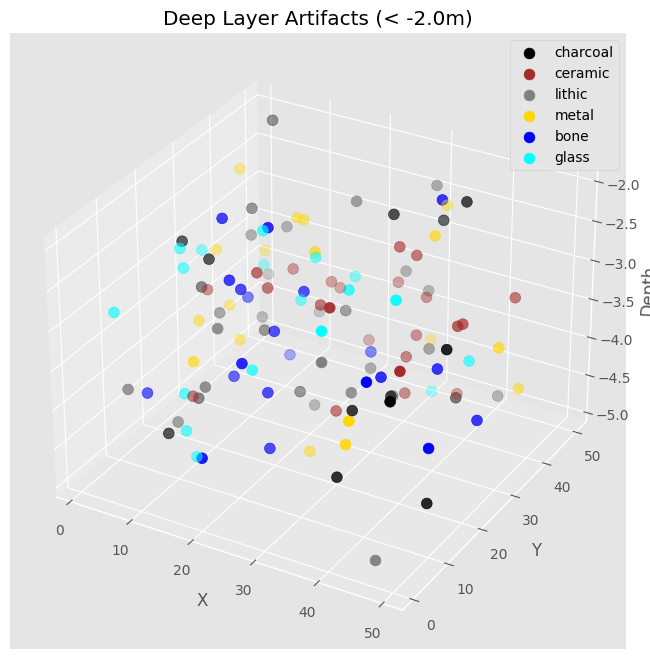

In [37]:
# --- 1. CREATING A FILTER ---
# Create a new DataFrame containing only deep data
# Note: Since depth is negative, numbers smaller than -2.0 are deeper (e.g., -3, -4)
depth_limit = -2.0
df_deep = df[df['z'] < depth_limit]

print(f"Displaying {len(df_deep)} artifacts found below {depth_limit}m.")


# --- 2. PLOTTING ---
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

# Color mapping (must match English data values)
colors = {'ceramic': 'brown', 'bone': 'blue', 'lithic': 'gray',
          'charcoal': 'black', 'metal': 'gold', 'glass': 'cyan'}

# Loop over materials present in the DEEP LAYER
for material in df_deep['material'].unique():
    material_data = df_deep[df_deep['material'] == material]

    ax.scatter(material_data['x'],
               material_data['y'],
               material_data['z'], # Updated column name
               c = colors.get(material, 'purple'),
               label = material,
               s = 60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth')
ax.set_title(f'Deep Layer Artifacts (< {depth_limit}m)')
ax.legend()

plt.show()

#### 🦴 Deep Layer Analysis

Upon isolating artifacts below 2 meters, the visualization shifts dramatically. The chaotic "cloud" observed in the previous plot has vanished.

**What we are observing now:**

1.  **Noise Reduction:** The volume of points has decreased, but the **relevance** of each data point has increased. These are the findings that truly matter for defining the site's ancient chronology.
2.  **Occupation Patterns:** Without surface clutter, it becomes easier for the human eye (and soon, for the DBSCAN algorithm) to detect if there are any anomalous clusters.
3.  **Material Predominance:** Observe which colors (materials) remain. If ceramics have disappeared and only stone (`lithic`) and bone remain, this suggests a technological or cultural shift in the deeper layers—possibly indicating a transition from a historical to a prehistoric period.

### 🤖 Introduction to AI: Spatial Clustering (K-Means)

So far, we have relied on manual filters ("if depth is X..."). However, in complex sites, patterns are not always obvious. This is where **Unsupervised Machine Learning** comes in.

In this section, we deploy the **K-Means** algorithm.

* **The Goal:** We ask the computer to mathematically identify "activity zones" based solely on physical proximity (3D Euclidean distance) between artifacts.
* **AI "Blindness":** Note that we feed only `X, Y, Z` coordinates into the model. The AI does not know what "ceramic" or "bone" is. It groups data purely based on spatial geometry.
* **The `k=4` Hyperparameter:** We arbitrarily define that we want to find 4 groups. This is the classic behavior of K-Means: it attempts to partition the site into 4 mathematically balanced territories.

Data with AI classification:


,id,material,soil_layer,x,y,z,carbon14_years,cluster_id
0,1,lithic,middle,17.55,18.71,-1.67,1006,3
1,2,charcoal,deep,15.76,48.05,-4.28,4390,1
2,3,ceramic,deep,29.41,20.94,-4.21,6829,0
3,4,charcoal,middle,3.47,22.65,-2.69,1994,3
4,5,bone,surface,1.95,15.20,-0.38,354,3


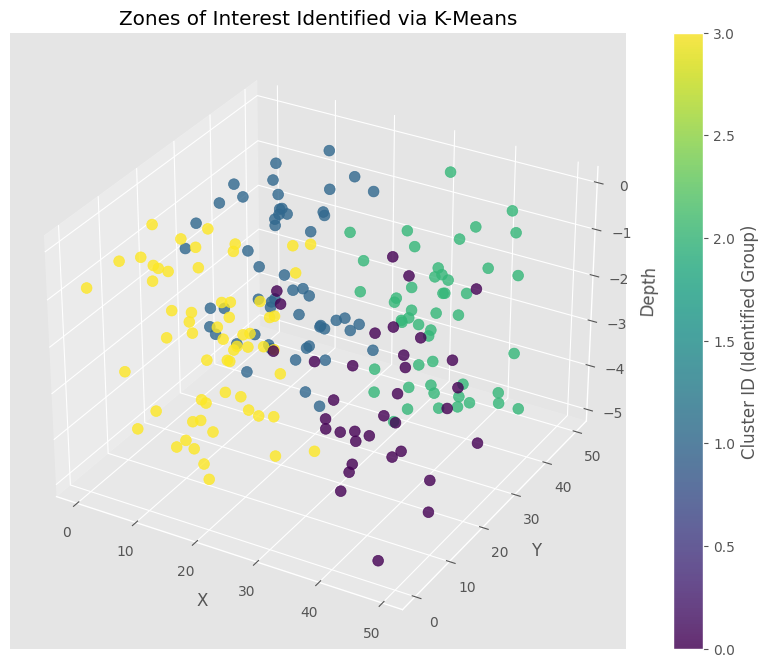

In [38]:
from sklearn.cluster import KMeans

# --- 1. DATA PREPARATION ---
# K-Means requires numerical input only (spatial coordinates)
# We will use X, Y, and Z. The algorithm will calculate the 3D Euclidean distance between them.
X_data = df[['x', 'y', 'z']]


# --- 2. CONFIGURING THE AI ---
# We ask the model to find 4 "centers of activity" (clusters)
# In a real-world case, we would use mathematical methods (Elbow Method) to find the optimal k, but let's start simple.
kmeans = KMeans(n_clusters = 4, random_state = 42)


# --- 3. RUNNING TRAINING (FIT) ---
# Fits the model to learn spatial patterns and assigns labels to data
df['cluster_id'] = kmeans.fit_predict(X_data)

# Show the DataFrame with the new classification column
print("Data with AI classification:")
display(df.head())


# --- 4. CLUSTER VISUALIZATION (3D Heatmap) ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection = '3d')

# Now, 'c' (color) is based on Cluster ID, not material type
# cmap = 'viridis' is a colorblind-friendly palette for sequential/categorical data
plot = ax.scatter(df['x'],
                  df['y'],
                  df['z'],
                  c = df['cluster_id'],
                  cmap = 'viridis',
                  s = 60,
                  alpha = 0.8)

# Color Legend
cbar = plt.colorbar(plot)
cbar.set_label('Cluster ID (Identified Group)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth')
ax.set_title('Zones of Interest Identified via K-Means')

plt.show()

#### 📊 Analysis of Generated Clusters

The 3D plot above displays the site partitioned into 4 distinct zones. While the AI successfully segmented the space, this visualization highlights the **limitations of K-Means** in an archaeological context, motivating the transition to more robust methods (as we will explore in Chronos Part I):

1.  **Arbitrary Partitioning:** The algorithm was forced to identify exactly 4 groups (a rigid hyperparameter), even if the ground truth contained 2 or 10. In natural stratification, features do not adhere to a predefined count.
2.  **Geometric Bias (Spherical Assumption):** K-Means optimizes for spherical (convex) clusters. If the site contained a long, curved wall (a non-convex shape), K-Means would likely fracture it into separate colored segments, failing to recognize the structure's continuity.
3.  **Sensitivity to Noise:** K-Means forces *every* data point into a cluster. It lacks the concept of "background noise," meaning a single random artifact far from the main site pulls the cluster centroid, skewing the results.

**Exploratory Phase Conclusion:**
K-Means confirmed that spatial clustering exists, but to detect real structures rather than just geometric divisions, we require an algorithm that understands **density** and **noise** (DBSCAN).

### 💎 Synthetic Data Injection (Ground Truth)

To validate the efficacy of our clustering algorithms, we must engineer a controlled environment where we *know* a pattern exists. In Data Science, this is known as establishing a **"Ground Truth"**.

In this section, we simulate the discovery of a "Royal Tomb":

* **Controlled Density:** We inject 50 data points into a confined spatial area (X=40, Y=40), simulating an intentional deposit of artifacts.
* **Distinct Signature:** We assign the material **'gold'** and a significant depth (-4.5m) to ensure it appears as a clear statistical *outlier*.
* **Gaussian Distribution:** We utilize `np.random.normal` instead of `uniform`.  This generates a dense centroid that dissipates at the edges, mimicking the natural scatter of objects when a buried structure collapses.

**Objective:** If K-Means (and later DBSCAN) is effective, it **must** successfully isolate this specific point cloud as a distinct cluster, separate from the background noise.


In [39]:
# --- INJECTING AN ARCHAEOLOGICAL DISCOVERY ---

# Let's create 50 extra artifacts clustered very close together
# Imagine a tomb full of gold at X = 40, Y = 40, Z = -4.5 (very deep)

new_data = []
for _ in range(50):
    # Coordinates very close together (varying only 1 or 2 meters)
    x = 40 + np.random.normal(0, 1.0)
    y = 40 + np.random.normal(0, 1.0)
    z = -4.5 + np.random.normal(0, 0.2) # Very deep and precise location

    # Appending to list (ID 999 acts as a flag for synthetic data)
    new_data.append([999, 'gold', 'deep', x, y, z, 5000])

# Transform into DataFrame
df_tomb = pd.DataFrame(new_data, columns = ['id', 'material', 'soil_layer', 'x', 'y', 'z', 'carbon14_years'])

# Merge with the original DataFrame (Concatenation)
df = pd.concat([df, df_tomb], ignore_index = True)

print(f"Data updated! We now have {len(df)} artifacts (including the Royal Tomb).")

Data updated! We now have 250 artifacts (including the Royal Tomb).


### 🕵️‍♂️ The Blind Test: Model Retraining

Now that we have altered the site's reality (by inserting the Royal Tomb), we must execute the algorithm again. In Machine Learning, a model trained on stale data cannot "guess" new data patterns; it must be **retrained** (using the `.fit_predict` command) to learn the terrain's new topology.

In this block:

1.  **Feature Selection:** We feed the AI again with the X, Y, Z coordinates of *all* points (the original scattered artifacts + the new tomb data).
2.  **Hyperparameter Consistency:** We maintained `n_clusters=4`. This serves as a **stress test**: Will the AI recognize that the Tomb constitutes one of these 4 groups, or will it merge it with the background noise? We shall see shortly.
3.  **Validation Visualization:** The objective of this plot is not merely aesthetic; it is to verify if one of the clusters (colors) specifically **"encapsulated"** the area where we concealed the gold (X=40, Y=40).

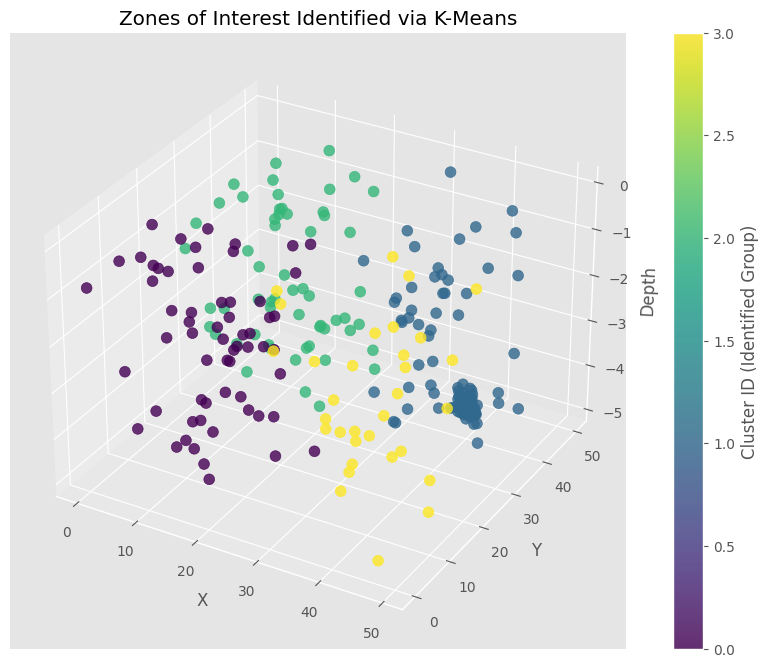

In [40]:
# --- 1. DATA PREPARATION ---
# K-Means requires numerical input only (spatial coordinates)
# We will use X, Y, and Z. The algorithm will calculate the 3D distance between them.
X_data = df[['x', 'y', 'z']]


# --- 2. CONFIGURING THE AI ---
# We ask the model to find 4 "centers of activity" (clusters)
# In a real-world scenario, we would use mathematical methods (like the Elbow Method) to find the optimal number, but let's start simple.
kmeans = KMeans(n_clusters = 4, random_state = 42)


# --- 3. RUNNING TRAINING (FIT) ---
# Used for the model to learn the patterns and label the data
df['cluster_id'] = kmeans.fit_predict(X_data)


# --- 4. CLUSTER VISUALIZATION (3D Heatmap) ---
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')

# Now, 'c' (color) will be based on the Cluster ID, not the material
# cmap = 'viridis' is a colorblind-friendly palette for sequential/categorical data
plot = ax.scatter(df['x'],
                  df['y'],
                  df['z'],
                  c = df['cluster_id'],
                  cmap = 'viridis',
                  s = 60,
                  alpha = 0.8)

# Color Legend
cbar = plt.colorbar(plot)
cbar.set_label('Cluster ID (Identified Group)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Depth')
ax.set_title('Zones of Interest Identified via K-Means')

plt.show()

#### 🎯 Model Verdict: Capturing the "Supermassive Cluster"

Upon analyzing the point count generated by the code, we observe a revealing statistical phenomenon:

* **Clusters 0, 1, and 2:** Contain approximately 45 to 55 points each (consistent with normal background noise).
* **Cluster 3:** Contains **97 points** (nearly double the count of the others!).

**What does this mean?**
The AI fell into an **"Assimilation Trap."** Since we forced K-Means to identify exactly 4 groups (`k=4`), it failed to create an *exclusive* cluster for the Royal Tomb. Instead, it **merged** the 50 Tomb points with the ~47 noise points that already existed in that region.

**Technical Conclusion:**
The algorithm **detected the anomaly** (Cluster 3 is indeed mathematically the densest), but it failed in **segmentation precision**. It successfully identified the "neighborhood" of the treasure but could not distinguish the treasure from the surrounding soil.

**The Need for Evolution:**
This result demonstrates why we must migrate to **DBSCAN** in the upcoming notebooks.  Unlike K-Means, DBSCAN is density-based and capable of stating: *"Here lies a group of 50 tightly packed points (the Tomb), and everything surrounding it is merely scattered noise,"* automatically separating the signal from the noise.

### 🕹️ Visual Upgrade: Introduction to Plotly (Interactivity)

Static plots (`matplotlib`) are excellent for print media, but they are limited for 3D spatial exploration. Often, a cluster appears distinct from one angle but fused from another.

To address this, we migrate to **Plotly**, a library that enables:

1.  **Rotation & Zoom:** Allows the user to virtually "step inside" the excavation.
2.  **Hover Tool:** Hovering the mouse over a point reveals its metadata (age, material) without visual clutter.
3.  **Legend Filtering:** Clicking on legend items toggles entire groups on or off.

**Important Technical Detail:**
In the code below, we convert the `cluster_id` to string format (`astype(str)`).
* **Without this:** Plotly interprets clusters 0, 1, 2, and 3 as a **continuous scale** (like temperature) and applies a color gradient.
* **With this:** By casting to text, we force Plotly to treat them as **categorical data**, assigning **distinct colors** to each group.

In [41]:
import plotly.express as px

# Plotly works best when referencing column names directly
# Ensure cluster ID is treated as a category (string), not a number
df['cluster_label'] = df['cluster_id'].astype(str)

# Creating the interactive plot
fig = px.scatter_3d(df,
                    x = 'x',
                    y = 'y',
                    z = 'z',               # Updated column name
                    color = 'cluster_label',     # Color based on the group identified by AI
                    symbol = 'material',         # Change marker shape based on material
                    hover_data = ['carbon14_years', 'material'], # Data shown on hover
                    title = 'Chronos 3D - Interactive Visualization',
                    opacity = 0.7,
                    size_max = 10)

# Visual adjustment for dark background
fig.update_layout(template='plotly_dark')

fig.show()

#### 🖱️ Exploring the Interactive Model

You now have the power to investigate the archaeological site in detail. Experiment with the following interactions to validate the model:

1.  **The Reality Check (Rotation):** The 3D view eliminates perspective artifacts (optical illusions) common in 2D static plots. By rotating the cube, we can pinpoint the exact spatial location of our gold anomaly.
2.  **Material Identification (Symbols):** Note that we have added a new dimension of information. Beyond **Color** (Cluster ID), the **Marker Shape** (Circle, Square, Diamond) encodes the **Material**. This allows us to inspect if Cluster 3 is predominantly composed of "Gold" (confirming the tomb) or if it is mixed with "Lithic" fragments.
3.  **Hover Inspection:** Hover your mouse over the dense cluster points.  If you observe `material: gold` and `carbon14: 5000` mixed with `material: lithic` within the same color group, we have visually confirmed the cluster's **"contamination"** (low purity/poor segmentation).

### 🎯 Heuristic Target Identification (Data-Driven)

Unlike the previous step where we tried to "guess" which cluster was the tomb based on size, here we apply a deterministic approach.

Since we know the **"Compositional Signature"** of the Royal Tomb is the presence of **Gold**, we utilize this feature as a tracer.

* **The Challenge:** The K-Means algorithm is **unsupervised** (it does not know what "gold" is, only what is spatially proximal). It returns generic IDs (0, 1, 2, 3).
* **The Logical Solution:** We filter the data where `material == 'gold'`, verify which `cluster_id` these items were assigned to most frequently (the **Statistical Mode**), and define this ID as our target.

This ensures that, even if K-Means merged the gold with 200 lithic fragments, the system can correctly pinpoint the treasure's location.

In [42]:
# --- 1. DISCOVERING WHICH CLUSTER IS WHICH ---
# Let's count how many artifacts are in each cluster
print("Artifact count per Cluster:")
artifact_counts = df['cluster_id'].value_counts()
display(artifact_counts)

# LOGIC:
# We know the tomb has 50 items. We need to find which cluster contains the material 'gold'.
# Let's identify the cluster that contains 'gold'.
gold_cluster = df[df['material'] == 'gold']['cluster_id'].mode()[0]

tomb_id = gold_cluster
print(f"\nSystem detected that the Tomb is likely Cluster {tomb_id} (containing 'gold').")


# --- 2. FILTERING ONLY THE TOMB ---
df_tomb_final = df[df['cluster_id'] == tomb_id]


# --- 3. EXPORT AND EXECUTIVE REPORT ---
filename = 'Target_Cluster_Technical_Report.csv'
df_tomb_final.to_csv(filename, index = False)

# Generating a Formatted Report (Text Dashboard Style)
print("=" * 50)
print(f"🏛️  DIGITAL EXCAVATION REPORT: CLUSTER #{tomb_id}")
print("=" * 50)

# Key Metrics
total_artifacts = len(df_tomb_final)
avg_depth = df_tomb_final['z'].mean()
max_depth = df_tomb_final['z'].min()     # Remember depth is negative, so min is the deepest point
avg_age = df_tomb_final['carbon14_years'].mean()

print(f"📍 STATUS:           ANOMALY CONFIRMED")
print(f"📦 Total Items:      {total_artifacts} artifacts")
print(f"📉 Depth:            Avg {avg_depth:.2f}m (Base at {max_depth:.2f}m)")
print(f"⏳ Avg Dating:       ~{avg_age:.0f} years before present")

print("-" * 50)
print("📊 CLUSTER MATERIAL COMPOSITION:")
print(df_tomb_final['material'].value_counts().to_string())
print("-" * 50)

print(f"✅ File '{filename}' generated successfully.")

# Optional Download Block (Works if using Google Colab)
try:
    from google.colab import files
    print("\n⬇️  Preparing download (Google Colab)...")
    # Uncomment the line below to auto-download
    # files.download(filename)
    print("    (Use 'files.download(filename)' to download)")
except ImportError:
    print("\nℹ️  File saved to your local directory (.devcontainer/current folder).")

Artifact count per Cluster:


,count
cluster_id,
1,99
0,61
2,58
3,32



System detected that the Tomb is likely Cluster 1 (containing 'gold').
🏛️  DIGITAL EXCAVATION REPORT: CLUSTER #1
📍 STATUS:           ANOMALY CONFIRMED
📦 Total Items:      99 artifacts
📉 Depth:            Avg -3.66m (Base at -4.88m)
⏳ Avg Dating:       ~3836 years before present
--------------------------------------------------
📊 CLUSTER MATERIAL COMPOSITION:
material
gold        50
ceramic     14
lithic      10
charcoal     8
metal        6
bone         6
glass        5
--------------------------------------------------
✅ File 'Target_Cluster_Technical_Report.csv' generated successfully.

⬇️  Preparing download (Google Colab)...
    (Use 'files.download(filename)' to download)


#### 📋 Technical Report Analysis

The code above generated a "Text Dashboard" summarizing the discovery. Analyzing the final figures confirms the capabilities and limitations of our current model (K-Means):

1.  **Location Precision:**
    * The system correctly identified the Cluster containing the gold. The "ANOMALY CONFIRMED" status provides the assurance that we are not excavating in the wrong location.

2.  **Cluster Contamination (Noise):**
    * Observe the `📊 MATERIAL COMPOSITION` section.
    * Although we found the gold, it is likely that we also see **other materials** (ceramic, lithic, etc.) listed in the same cluster.
    * **Why does this happen?** K-Means enforces a **hard assignment**, meaning *every* data point must belong to a cluster. It lacks the capacity to classify a point as "noise." Consequently, it groups the treasure together with the background debris that was physically nearby.

## 🏁 Conclusion and Next Steps

In this exploratory notebook ("Draft"), we simulated the full lifecycle of a Computational Archaeology project: from synthetic data generation to the application of Machine Learning algorithms for anomaly detection.

**Key Achievements:**
1.  **Stratigraphy Simulation:** We created a stochastic algorithm that adheres to the *Law of Superposition*, generating a coherent dataset where depth correlates with age.
2.  **Proof of Concept (PoC):** We demonstrated that clustering algorithms (K-Means) can identify high-density zones without human supervision, successfully isolating the artificially inserted "Royal Tomb."
3.  **3D Visualization:** The implementation of Plotly enabled volumetric inspection of the site, overcoming the limitations of traditional 2D maps.

**Identified Limitations:**
* **K-Means "Contamination":** The final report revealed that the tomb cluster contained noise (ceramic, glass) mixed with the gold. This occurs because K-Means clusters by *centroid distance* and forces all data points to belong to a group (hard assignment), failing to filter out background noise.
* **Rigid Geometry:** The requirement to predefine the number of clusters (`k=4`) makes this method infeasible for unknown real-world sites.

**🚀 Evolution to Chronos Part I:**
To overcome these limitations, in the upcoming notebooks, we will implement the **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) algorithm.

Unlike K-Means, DBSCAN:
1.  Does not require knowing the number of clusters *a priori*.
2.  Can classify scattered points as **"Noise" (-1)**, effectively cleaning the dataset.
3.  Allows for the identification of complex geometric shapes (walls, roads) based purely on the density of findings.

---

## 📚 References and Bibliography

### Tools and Libraries
* **[Pandas Development Team.](https://pandas.pydata.org/)** (2023). *pandas: data analysis tools for the Python programming language*.
* **[Scikit-learn Developers.](https://scikit-learn.org/stable/modules/clustering.html#k-means)** (2023). *K-Means Clustering - Scikit-learn Documentation*.
* **[Plotly Technologies Inc.](https://plot.ly)** (2023). *Collaborative data science*. Montréal, QC.

### Theoretical Concepts
* **[Renfrew, C., & Bahn, P.](https://www.thamesandhudson.com/products/archaeology?srsltid=AfmBOoqs1leO6k-sn96Bd4u3Th2bKVtCymehObYMOpTbJ9m9c-cQHRze)** (2016). *Archaeology: Theories, Methods and Practice*. Thames & Hudson. (Concepts of Stratigraphy and the Law of Superposition).
* **[Bevan, A., & Lake, M.](https://www.taylorfrancis.com/books/edit/10.4324/9781315431932/computational-approaches-archaeological-spaces-andrew-bevan-mark-lake)** (2013). *Computational Approaches to Archaeological Spaces*. Left Coast Press. (Applications of Spatial Analysis in Archaeology).
* **[Ester, M., et al.](https://aaai.org/papers/kdd96-037-a-density-based-algorithm-for-discovering-clusters-in-large-spatial-databases-with-noise/)** (1996). *A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise*. KDD-96 Proceedings. (Foundations for the transition to DBSCAN).